In [168]:
import pandas as pd
import numpy as np
import matplotlib as mpl          
import matplotlib.pyplot as plt 
import seaborn as sns
import operator
import glob
%matplotlib inline 

라이브러리 불러오기

In [169]:
data= pd.read_csv('./CARD_SPENDING.txt', sep='\t')

데이터 불러오기

In [170]:
# read files
weather_allFiles1 = glob.glob('./환경기상데이터/노원구/*')
weather_allFiles2 = glob.glob('./환경기상데이터/S종로구/*')
allFiles = weather_allFiles1 + weather_allFiles2
w = []

for f in allFiles:
    temp = pd.read_csv(f)
    w.append(temp)

weather = pd.concat(w)

weather.drop(['flag', 'co2', 'vocs', 'noise',
              'temp', 'humi', 'Unnamed: 10'], axis = 1, inplace=True)

# 이상치 제거
weather = weather[weather['pm10'] != -999]
weather['tm'] = weather['tm'] // 10000
weather.head()

# 계층적 인덱스를 사용하지 않아서 reset_index() 로 인덱스를 칼럼으로 변환
# groupby serial & tm and average
weather = weather.groupby(['tm', 'serial']).mean().reset_index()

# serial number 를 행정동코드로 바꾼다.
weather.replace('V10O1610252',11110615, inplace = True)
weather.replace('V10O1610546',11110615, inplace = True)
weather.replace('V10O1610540',11110615, inplace = True)
weather.replace('V10O1610542',11110615, inplace = True)
weather.replace('V10O1610543',11110615, inplace = True)
weather.replace('V10O1610544',11110615, inplace = True)
weather.replace('V10O1610545',11110615, inplace = True)
weather.replace('V10O1610567',11110615, inplace = True)
weather.replace('V01o1610468',11110530, inplace = True)
weather.replace('V10O1611289',999, inplace = True)
weather.replace('V10O1611172',11110530, inplace = True)
weather.replace('V10O1611634',11110600, inplace = True)
weather.replace('V10O1611887',999, inplace = True)
weather.replace('V10O1611639',11110630, inplace = True)
weather.replace('V10O1611658',11110640, inplace = True)
weather.replace('V10O1612113',11110615, inplace = True)
weather.replace('V10O1611151',11110670, inplace = True)
weather.replace('V10O1611145',11110615, inplace = True)
weather.replace('V10O1611623',11110650, inplace = True)
weather.replace('V10O1611750',11110615, inplace = True)
weather.replace('V10O1611170',11110550, inplace = True)
weather.replace('V10O1611684',11110615, inplace = True)
weather.replace('V10O1611220',11110670, inplace = True)
weather.replace('V10O1612106',11110710, inplace = True)
weather.replace('V10O1611251',11110690, inplace = True)
weather.replace('V10O1611173',11110615, inplace = True)
weather.replace('V10O1611258',11110560, inplace = True)
weather.replace('V10O1611255',11110515, inplace = True)
weather.replace('V10O1611698',11110600, inplace = True)
weather.replace('V10O1611722',11110600, inplace = True)
weather.replace('V10O1611645',11110650, inplace = True)
weather.replace('V10O1610610',11350611, inplace = True)
weather.replace('V10O1610376',11350695, inplace = True)
weather.replace('V10O1610293',11350720, inplace = True)
weather.replace('V10O1610356',11350630, inplace = True)
weather.replace('V10O1610616',11350640, inplace = True)
weather.replace('V10O1610200',11350640, inplace = True)
weather.replace('V10O1610643',11350580, inplace = True)
weather.replace('V10O1610642',11350600, inplace = True)
weather.replace('V10O1610297',11350670, inplace = True)
weather.replace('V10O1610312',11350640, inplace = True)
weather.replace('V10O1610102',11350611, inplace = True)
weather.replace('V10O1610351',11350695, inplace = True)
weather.replace('V10O1610629',11350595, inplace = True)
weather.replace('V10O1610630',11350595, inplace = True)
weather.replace('V10O1611104',11350695, inplace = True)
weather.replace('V10O1611097',11350625, inplace = True)
weather.replace('V10O1611100',11350640, inplace = True)
weather.replace('V10O1612126',11350619, inplace = True)
weather.replace('V10O1611102',11350670, inplace = True)
weather.replace('V10O1611652',11350600, inplace = True)
weather.replace('V10O1611150',11350665, inplace = True)
weather.replace('V10O1611229',11350560, inplace = True)

# 유통:종합테이블과 컬럼명을 맞춰준다.
weather.rename(columns = {'serial':'ADMD_CD'}, inplace = True)
weather.drop(weather[weather['ADMD_CD']==999].index, axis=0, inplace = True)

weather.drop('ADMD_CD',axis=1)
weather_pm = weather.groupby('tm')['pm10','pm25'].mean()

pm_high_date=[]
pm_middle_date=[]
pm_low_date=[]
for i in data['STD_DD'].unique():
    if weather_pm.loc[i]['pm10'] > 80 or weather_pm.loc[i]['pm25'] > 35:
        pm_high_date.append([i,2])
    elif weather_pm.loc[i]['pm10'] < 30 and weather_pm.loc[i]['pm25'] < 15:
        pm_low_date.append([i,0])
    else : pm_middle_date.append([i,1])
        
        


기상파일 통합 + 미세먼지 농도별 날짜 구분

In [171]:
data['GU_CD'] = data['GU_CD'] + 11000
data['GU_CD'] = data['GU_CD'] * 1000

In [172]:
data['GU_CD']= data['GU_CD'] + data['DONG_CD']

In [173]:
data = data.drop('DONG_CD', axis = 1)

카드 지역데이터와 다른 파일의 지역데이터 형식 통일

In [174]:
data.head()

,STD_DD,GU_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20180401,11110515,21,F,30,4,180
1,20180401,11110515,21,F,55,4,22
2,20180401,11110515,21,M,20,35,184
3,20180401,11110515,21,M,25,70,425
4,20180401,11110515,21,M,30,18,82


In [175]:
pm_high_date=[]
pm_middle_date=[]
pm_low_date=[]
for i in data['STD_DD'].unique():
    if weather_pm.loc[i]['pm10'] > 80 or weather_pm.loc[i]['pm25'] > 35:
        pm_high_date.append(i)
    elif weather_pm.loc[i]['pm10'] < 30 and weather_pm.loc[i]['pm25'] < 15:
        pm_low_date.append(i)
    else : pm_middle_date.append(i)

미세먼지 나쁨, 보통, 좋음 구분

In [176]:
date_amt = data.groupby('STD_DD')['USE_AMT'].sum()

날짜별 매출 총량 집계

In [177]:
pm_high_date_amt = []
pm_middle_date_amt = []
pm_low_date_amt = []

for i in pm_high_date:
    pm_high_date_amt.append([i,date_amt.loc[i]])
for i in pm_middle_date:
    pm_middle_date_amt.append([i,date_amt.loc[i]])
for i in pm_low_date:
    pm_low_date_amt.append([i,date_amt.loc[i]])

미세먼지 농도에 따른 날짜별 매출 총량

In [178]:
##주말 날짜 구분

weekend_data = data.groupby('STD_DD')['USE_AMT'].sum()
weekdata_index = list(weekend_data.index)

weekend_data_saturday = []
weekend_data_sunday = []

for i in range(53):  #토요일
    weekend_data_saturday.append(weekdata_index[0+(7*i)])
for i in range(52): #일요일
    weekend_data_sunday.append(weekdata_index[6+(7*i)])
weekend_date = [] #토요일+일요일
for i in weekend_data_saturday:
    weekend_date.append(i)
for i in weekend_data_sunday:
    weekend_date.append(i)
weekend_date.sort()

weekend_amount=[]
for i in weekend_date:
    weekend_amount.append(data[data['STD_DD']==i].groupby('STD_DD')['USE_AMT'].sum())
    
weekend_amount= pd.concat(weekend_amount)
df = pd.DataFrame(list(weekend_amount.index), columns=['Day'])
df["Amount"] = list(weekend_amount)

holiday = [20180505, 20180507, 20180522, 20180606, 20180613, 20180815,
          20180923, 20180924, 20180925, 20180926, 20181003, 20181009, 20181225,
          20190101, 20190204, 20190205, 20190206, 20190301]
holiday_amount=[]
for i in holiday:
    holiday_amount.append(data[data['STD_DD']==i].groupby('STD_DD')['USE_AMT'].sum())
holiday_amount= pd.concat(holiday_amount)
df_holi = pd.DataFrame(list(holiday_amount.index), columns=['Day'])
df_holi["Amount"] = list(holiday_amount)

weekend_date_copy = weekend_date
for i in holiday:
    weekend_date_copy.append(i)
total_holiday = list(set(weekend_date_copy))
total_holiday.sort()

휴일 구분

In [179]:
pm_high_date_amt = pd.DataFrame(pm_high_date_amt, columns = ['Day', 'Amt'])
pm_middle_date_amt = pd.DataFrame(pm_middle_date_amt,columns = ['Day', 'Amt'])
pm_low_date_amt = pd.DataFrame(pm_low_date_amt,columns = ['Day', 'Amt'])

미세먼지 농도에 따른 매출 데이터 프레임만들기

In [180]:
month= [20180401,20180501,20180601,20180701,20180801,20180901,20181001,20181101,20181201,20190101,20190201,20190301,20190401]

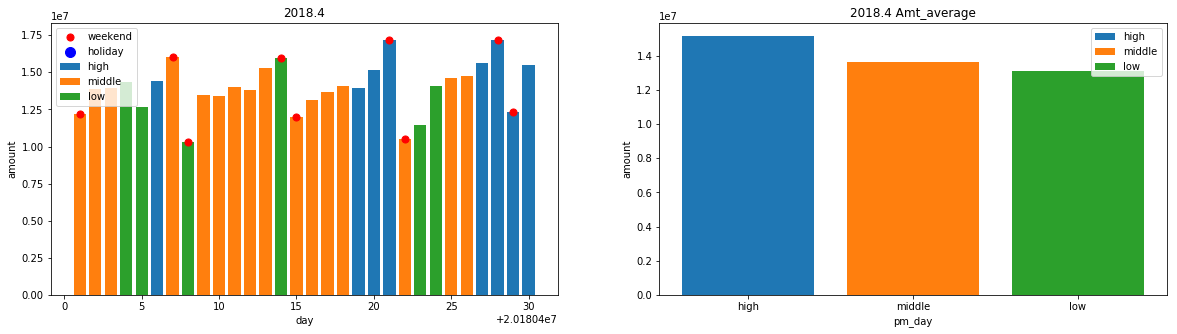

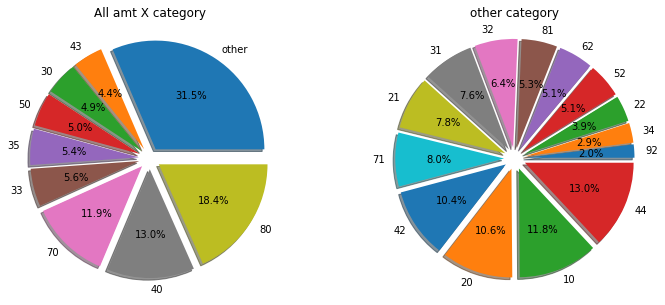

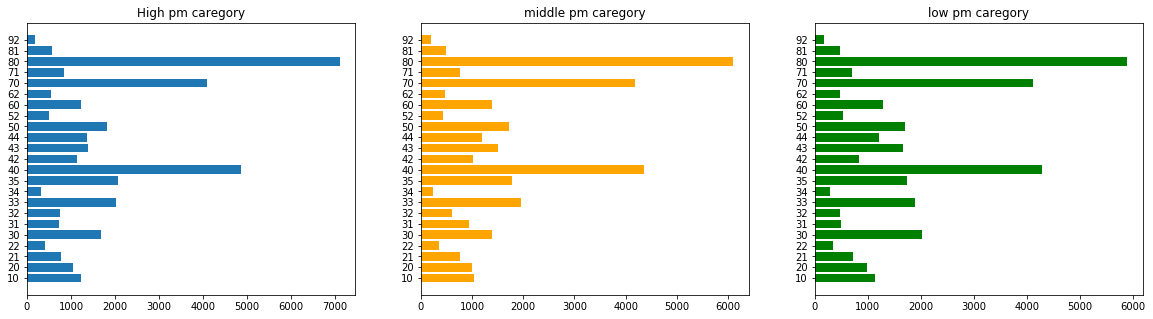

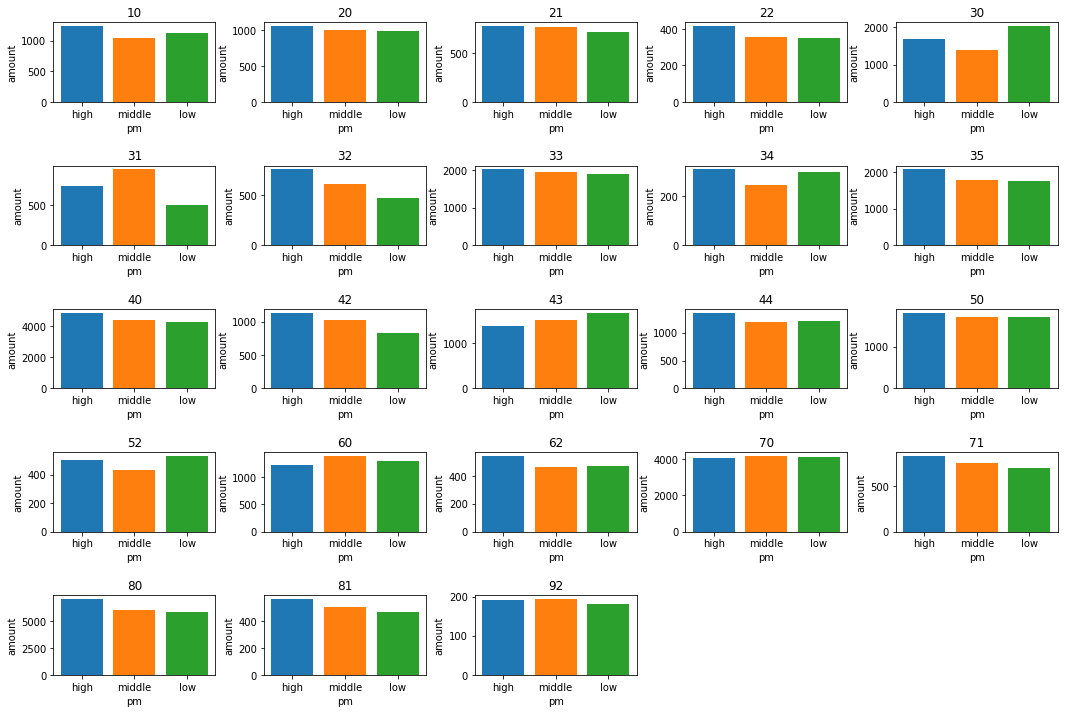

In [181]:
i=0
pm_high_month = pm_high_date_amt[(pm_high_date_amt['Day']<month[i+1]) & (pm_high_date_amt['Day']>=month[i])]
pm_middle_month = pm_middle_date_amt[(pm_middle_date_amt['Day']<month[i+1]) & (pm_middle_date_amt['Day']>=month[i])]
pm_low_month = pm_low_date_amt[(pm_low_date_amt['Day']<month[i+1]) & (pm_low_date_amt['Day']>=month[i])]


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(pm_high_month['Day'],pm_high_month['Amt'])
plt.bar(pm_middle_month['Day'],pm_middle_month['Amt'])
plt.bar(pm_low_month['Day'],pm_low_month['Amt'])
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2018.4')
plt.scatter(df[(df['Day']<month[i+1]) & (df['Day']>=month[i])]['Day'],
            df[(df['Day']<month[i+1]) & (df['Day']>=month[i])]['Amount'], color='r',s=50, zorder=10)
plt.scatter(df_holi[(df_holi['Day']<month[i+1]) & (df_holi['Day']>=month[i])]['Day'],
            df_holi[(df_holi['Day']<month[i+1]) & (df_holi['Day']>=month[i])]['Amount'], color='b',s=100,zorder=9)
plt.legend(['weekend','holiday','high', 'middle', 'low'])

plt.subplot(1,2,2)
plt.bar('high',pm_high_month['Amt'].mean())
plt.bar('middle',pm_middle_month['Amt'].mean())
plt.bar('low',pm_low_month['Amt'].mean())
plt.legend(['high', 'middle', 'low'])
plt.xlabel('pm_day')
plt.ylabel('amount')
plt.title('2018.4 Amt_average')

middle_MCT_CAT_CD=[]
a=[]
for i in pm_middle_month['Day']:    
    a.append(data[data["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))    
for i in code:
    middle_MCT_CAT_CD.append([i,a.loc[i].mean()])

high_MCT_CAT_CD=[]
a=[]
for i in pm_high_month['Day']:    
    a.append(data[data["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))           
for i in code:
    high_MCT_CAT_CD.append([i,a.loc[i].mean()])
    
low_MCT_CAT_CD=[]   
a=[]
for i in pm_low_month['Day']:    
    a.append(data[data["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))             
for i in code:
    low_MCT_CAT_CD.append([i,a.loc[i].mean()])

high_MCT_CAT_CD = np.array(high_MCT_CAT_CD)
middle_MCT_CAT_CD = np.array(middle_MCT_CAT_CD)
low_MCT_CAT_CD = np.array(low_MCT_CAT_CD)

all_amt = (high_MCT_CAT_CD+middle_MCT_CAT_CD+low_MCT_CAT_CD)/3
pie =[]
pie.append(['other' , sum(sorted(all_amt, key= operator.itemgetter(1))[:15])[1]])
for i in range(8):
    pie.append([str(int(sorted(all_amt, key= operator.itemgetter(1))[15+i][0])),sorted(all_amt, key= operator.itemgetter(1))[15+i][1]])
pie = np.array(pie)         
pie_key = pie[:,0]
pie_val = pie[:,1]

pie_other = []
for i in range(14):
    pie_other.append([str(int(sorted(all_amt, key= operator.itemgetter(1))[i][0])) , sorted(all_amt, key= operator.itemgetter(1))[i][1]])                    
pie_other = np.array(pie_other)      
pie_other_key = pie_other[:,0]
pie_other_val = pie_other[:,1]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(pie_val, labels=pie_key , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);
plt.title("All amt X category")
plt.subplot(1,2,2)
plt.title("other category")
plt.pie(pie_other_val, labels=pie_other_key , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);

high_MCT=[]
middle_MCT=[]
low_MCT=[]
high_MCT_code=[]
middle_MCT_code=[]
low_MCT_code=[]
for i in range(len(high_MCT_CAT_CD)):
    high_MCT.append(high_MCT_CAT_CD[i,1])
    high_MCT_code.append(str(int(high_MCT_CAT_CD[i,0])))
for i in range(len(middle_MCT_CAT_CD)):
    middle_MCT.append(middle_MCT_CAT_CD[i,1])
    middle_MCT_code.append(str(int(middle_MCT_CAT_CD[i,0])))   
for i in range(len(low_MCT_CAT_CD)):
    low_MCT.append(low_MCT_CAT_CD[i,1])
    low_MCT_code.append(str(int(low_MCT_CAT_CD[i,0])))
    
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
plt.barh(high_MCT_code , high_MCT)
plt.title("High pm caregory")
plt.subplot(1,3,2)
plt.barh(middle_MCT_code , middle_MCT, color = 'orange')
plt.title("middle pm caregory")
plt.subplot(1,3,3)
plt.barh(low_MCT_code , low_MCT , color = 'g' )
plt.title("low pm caregory")
plt.figure(figsize= (18,12))
for i in range(23):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
    plt.bar('high', high_MCT_CAT_CD[i,1])
    plt.bar('middle', middle_MCT_CAT_CD[i,1])
    plt.bar('low', low_MCT_CAT_CD[i,1])
    plt.xlabel('pm')
    plt.ylabel('amount')
    plt.title(str(int(high_MCT_CAT_CD[i,0])))



월별 미세먼지 농도에 따른 매출, 소비항목, 소비량 시각화

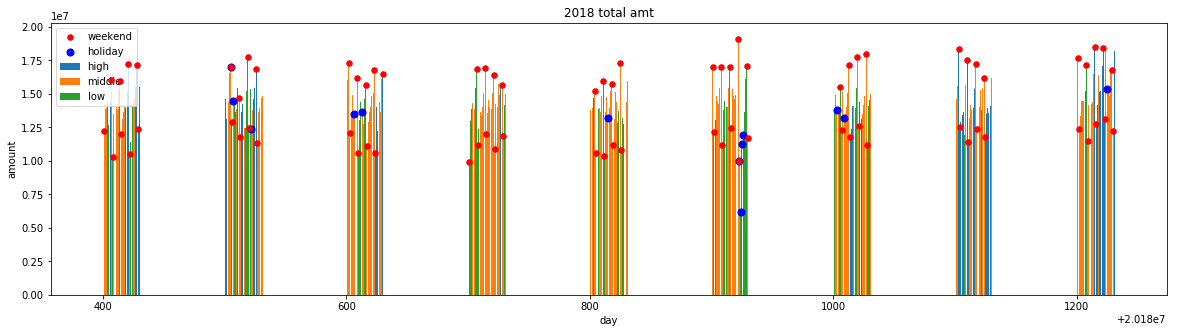

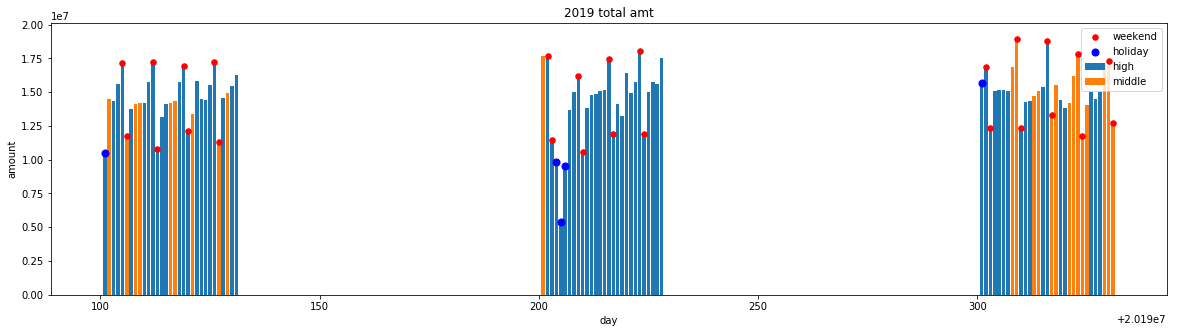

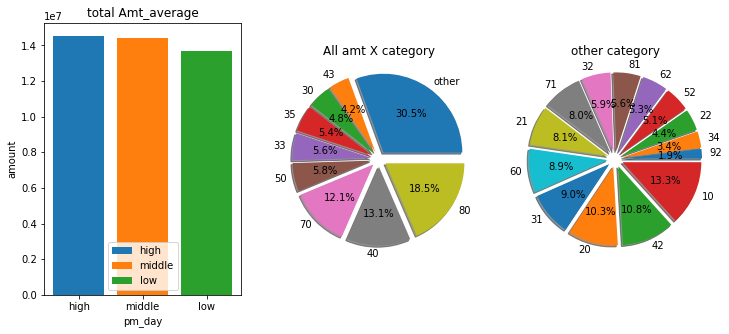

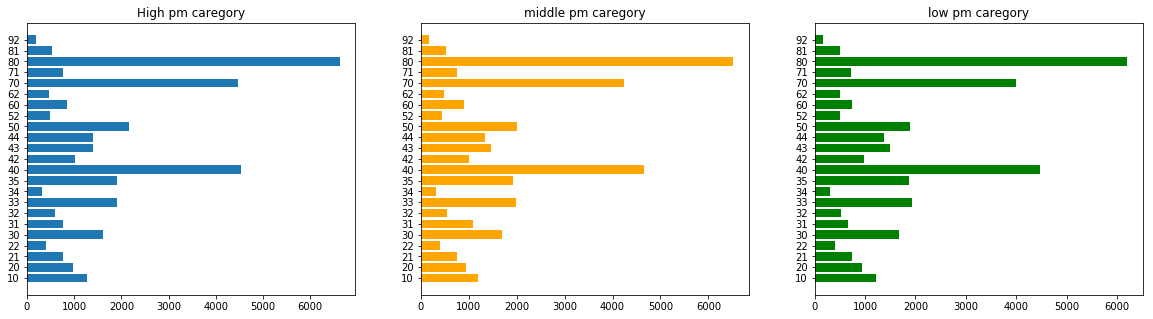

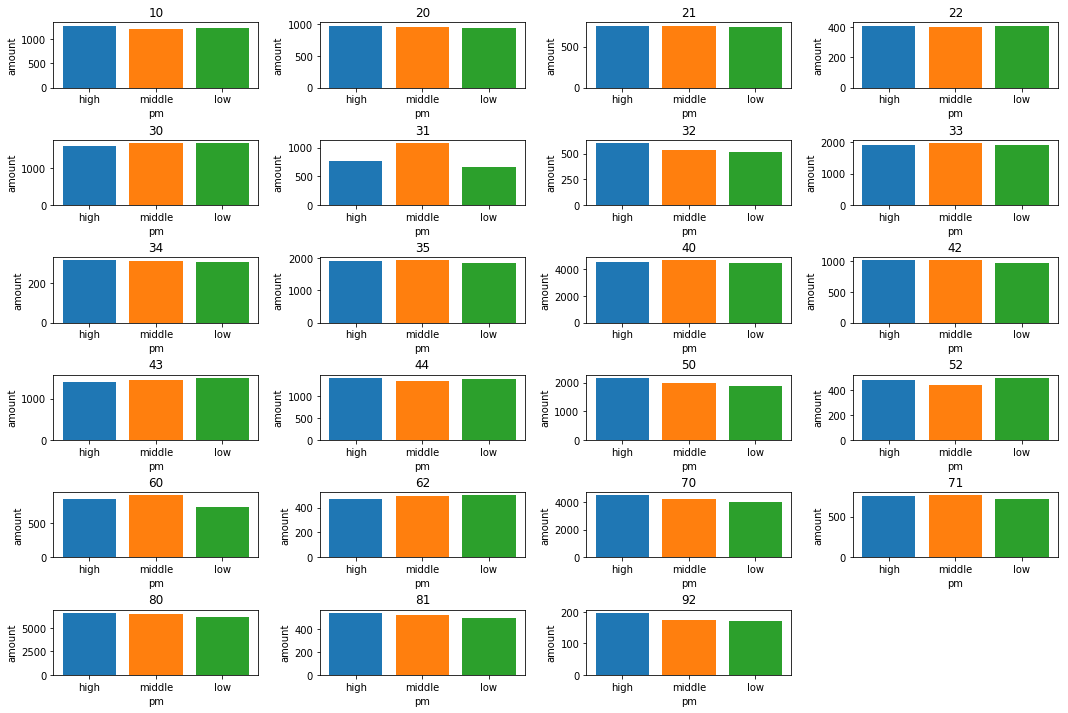

In [ ]:
pm_high_month = pm_high_date_amt
pm_middle_month = pm_middle_date_amt
pm_low_month = pm_low_date_amt

pm_high_month_1 = pm_high_date_amt[(pm_high_date_amt['Day']<month[9])]
pm_middle_month_1 = pm_middle_date_amt[(pm_middle_date_amt['Day']<month[9])]
pm_low_month_1 = pm_low_date_amt[(pm_low_date_amt['Day']<month[9])]

pm_high_month_2 = pm_high_date_amt[pm_high_date_amt['Day']>=month[9]]
pm_middle_month_2 = pm_middle_date_amt[pm_middle_date_amt['Day']>=month[9]]
pm_low_month_2 = pm_low_date_amt[pm_low_date_amt['Day']>=month[9]]



plt.figure(figsize=(20,5))
plt.bar(pm_high_month_1['Day'], pm_high_month_1['Amt'])
plt.bar(pm_middle_month_1['Day'],pm_middle_month_1['Amt'])
plt.bar(pm_low_month_1['Day'],pm_low_month_1['Amt'])
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2018 total amt')
plt.scatter(df[(df['Day']<month[9])]['Day'],
            df[(df['Day']<month[9])]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi[(df_holi['Day']<month[9])]['Day'],
            df_holi[(df_holi['Day']<month[9])]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle', 'low'])

plt.figure(figsize=(20,5))
plt.bar(pm_high_month_2['Day'], pm_high_month_2['Amt'])
plt.bar(pm_middle_month_2['Day'],pm_middle_month_2['Amt'])
plt.bar(pm_low_month_2['Day'],pm_low_month_2['Amt'])
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2019 total amt')
plt.scatter(df[df['Day']>=month[9]]['Day'],
            df[df['Day']>=month[9]]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi[df_holi['Day']>=month[9]]['Day'],
            df_holi[df_holi['Day']>=month[9]]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle'])

middle_MCT_CAT_CD=[]
a=[]
for i in pm_middle_month['Day']:    
    a.append(data[data["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))    
for i in code:
    middle_MCT_CAT_CD.append([i,a.loc[i].mean()])

high_MCT_CAT_CD=[]
a=[]
for i in pm_high_month['Day']:    
    a.append(data[data["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))           
for i in code:
    high_MCT_CAT_CD.append([i,a.loc[i].mean()])
    
low_MCT_CAT_CD=[]   
a=[]
for i in pm_low_month['Day']:    
    a.append(data[data["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))             
for i in code:
    low_MCT_CAT_CD.append([i,a.loc[i].mean()])

high_MCT_CAT_CD = np.array(high_MCT_CAT_CD)
middle_MCT_CAT_CD = np.array(middle_MCT_CAT_CD)
low_MCT_CAT_CD = np.array(low_MCT_CAT_CD)

all_amt = (high_MCT_CAT_CD+middle_MCT_CAT_CD+low_MCT_CAT_CD)/3
pie =[]
pie.append(['other' , sum(sorted(all_amt, key= operator.itemgetter(1))[:15])[1]])
for i in range(8):
    pie.append([str(int(sorted(all_amt, key= operator.itemgetter(1))[15+i][0])),sorted(all_amt, key= operator.itemgetter(1))[15+i][1]])
pie = np.array(pie)         
pie_key = pie[:,0]
pie_val = pie[:,1]

pie_other = []
for i in range(14):
    pie_other.append([str(int(sorted(all_amt, key= operator.itemgetter(1))[i][0])) , sorted(all_amt, key= operator.itemgetter(1))[i][1]])                    
pie_other = np.array(pie_other)      
pie_other_key = pie_other[:,0]
pie_other_val = pie_other[:,1]

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.bar('high',pm_high_month['Amt'].mean())
plt.bar('middle',pm_middle_month['Amt'].mean())
plt.bar('low',pm_low_month['Amt'].mean())
plt.legend(['high', 'middle', 'low'])
plt.xlabel('pm_day')
plt.ylabel('amount')
plt.title('total Amt_average')

plt.subplot(1,3,2)
plt.pie(pie_val, labels=pie_key , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);
plt.title("All amt X category")

plt.subplot(1,3,3)
plt.title("other category")
plt.pie(pie_other_val, labels=pie_other_key , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);

high_MCT=[]
middle_MCT=[]
low_MCT=[]
high_MCT_code=[]
middle_MCT_code=[]
low_MCT_code=[]
for i in range(len(high_MCT_CAT_CD)):
    high_MCT.append(high_MCT_CAT_CD[i,1])
    high_MCT_code.append(str(int(high_MCT_CAT_CD[i,0])))
for i in range(len(middle_MCT_CAT_CD)):
    middle_MCT.append(middle_MCT_CAT_CD[i,1])
    middle_MCT_code.append(str(int(middle_MCT_CAT_CD[i,0])))   
for i in range(len(low_MCT_CAT_CD)):
    low_MCT.append(low_MCT_CAT_CD[i,1])
    low_MCT_code.append(str(int(low_MCT_CAT_CD[i,0])))
    
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
plt.barh(high_MCT_code , high_MCT)
plt.title("High pm caregory")
plt.subplot(1,3,2)
plt.barh(middle_MCT_code , middle_MCT, color = 'orange')
plt.title("middle pm caregory")
plt.subplot(1,3,3)
plt.barh(low_MCT_code , low_MCT , color = 'g' )
plt.title("low pm caregory")

plt.figure(figsize= (18,12))
for i in range(23):
    plt.subplot(6,4,i+1)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
    plt.bar('high', high_MCT_CAT_CD[i,1])
    plt.bar('middle', middle_MCT_CAT_CD[i,1])
    plt.bar('low', low_MCT_CAT_CD[i,1])
    plt.xlabel('pm')
    plt.ylabel('amount')
    plt.title(str(int(high_MCT_CAT_CD[i,0])))



전체 미세먼지에 따른 소비량, 매출 구성 시각화

In [ ]:
data_female = data[data['SEX_CD']=='F']
data_male = data[data['SEX_CD']=='M']

성별 구분

In [ ]:
##주말 날짜 구분

weekend_data = data_female.groupby('STD_DD')['USE_AMT'].mean()
weekdata_index = list(weekend_data.index)

weekend_data_saturday = []
weekend_data_sunday = []

for i in range(53):  #토요일
    weekend_data_saturday.append(weekdata_index[0+(7*i)])
for i in range(52): #일요일
    weekend_data_sunday.append(weekdata_index[6+(7*i)])
weekend_date = [] #토요일+일요일
for i in weekend_data_saturday:
    weekend_date.append(i)
for i in weekend_data_sunday:
    weekend_date.append(i)
weekend_date.sort()

weekend_amount_female=[]
for i in weekend_date:
    weekend_amount_female.append(data_female[data_female['STD_DD']==i].groupby('STD_DD')['USE_AMT'].mean())
    
weekend_amount_female= pd.concat(weekend_amount_female)
df_female = pd.DataFrame(list(weekend_amount_female.index), columns=['Day'])
df_female["Amount"] = list(weekend_amount_female)

holiday = [20180505, 20180507, 20180522, 20180606, 20180613, 20180815,
          20180923, 20180924, 20180925, 20180926, 20181003, 20181009, 20181225,
          20190101, 20190204, 20190205, 20190206, 20190301]
holiday_amount_female=[]
for i in holiday:
    holiday_amount_female.append(data_female[data_female['STD_DD']==i].groupby('STD_DD')['USE_AMT'].mean())
holiday_amount_female= pd.concat(holiday_amount_female)
df_holi_female = pd.DataFrame(list(holiday_amount_female.index), columns=['Day'])
df_holi_female["Amount"] = list(holiday_amount_female)


여성 데이터 휴일 구분

In [ ]:
##주말 날짜 구분

weekend_data = data_male.groupby('STD_DD')['USE_AMT'].mean()
weekdata_index = list(weekend_data.index)

weekend_data_saturday = []
weekend_data_sunday = []

for i in range(53):  #토요일
    weekend_data_saturday.append(weekdata_index[0+(7*i)])
for i in range(52): #일요일
    weekend_data_sunday.append(weekdata_index[6+(7*i)])
weekend_date = [] #토요일+일요일
for i in weekend_data_saturday:
    weekend_date.append(i)
for i in weekend_data_sunday:
    weekend_date.append(i)
weekend_date.sort()

weekend_amount_male=[]
for i in weekend_date:
    weekend_amount_male.append(data_male[data_male['STD_DD']==i].groupby('STD_DD')['USE_AMT'].mean())
    
weekend_amount_male= pd.concat(weekend_amount_male)
df_male = pd.DataFrame(list(weekend_amount_male.index), columns=['Day'])
df_male["Amount"] = list(weekend_amount_male)

holiday = [20180505, 20180507, 20180522, 20180606, 20180613, 20180815,
          20180923, 20180924, 20180925, 20180926, 20181003, 20181009, 20181225,
          20190101, 20190204, 20190205, 20190206, 20190301]
holiday_amount_male=[]
for i in holiday:
    holiday_amount_male.append(data_male[data_male['STD_DD']==i].groupby('STD_DD')['USE_AMT'].mean())
holiday_amount_male= pd.concat(holiday_amount_male)
df_holi_male = pd.DataFrame(list(holiday_amount_male.index), columns=['Day'])
df_holi_male["Amount"] = list(holiday_amount_male)


남성 데이터 휴일구분

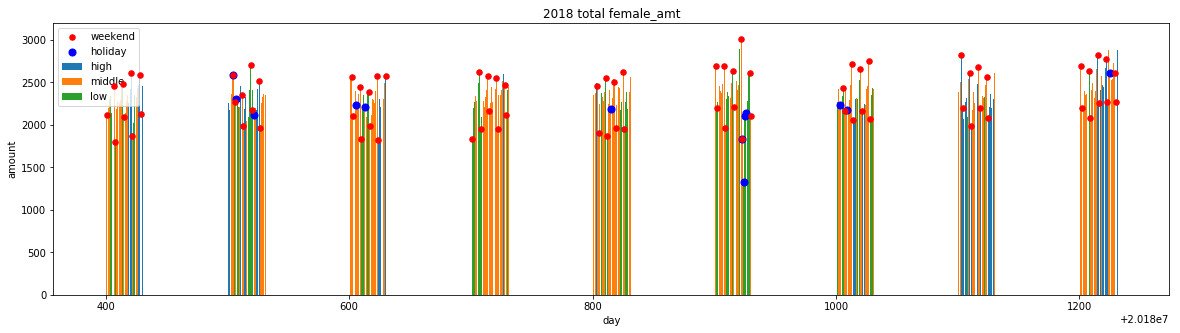

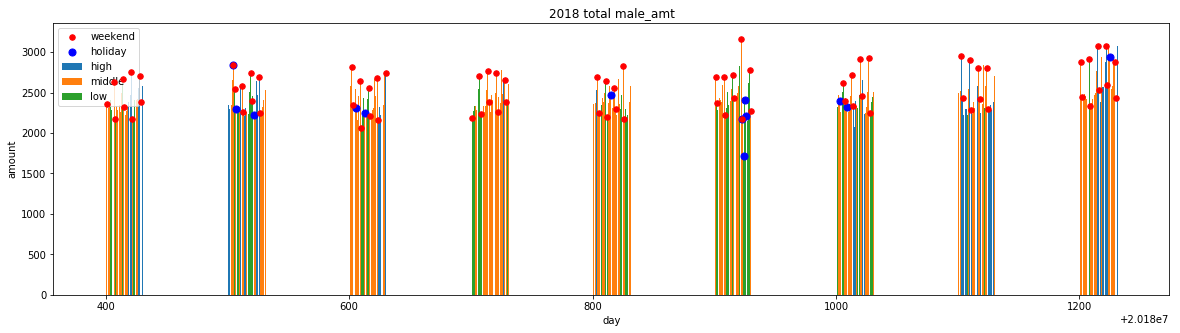

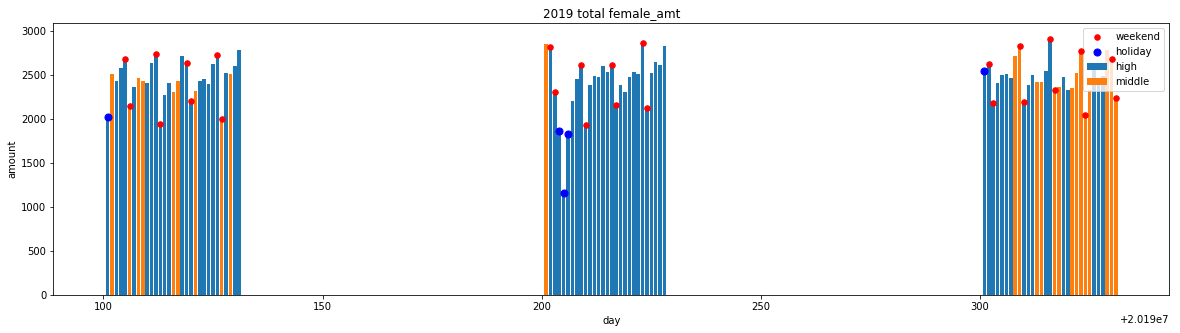

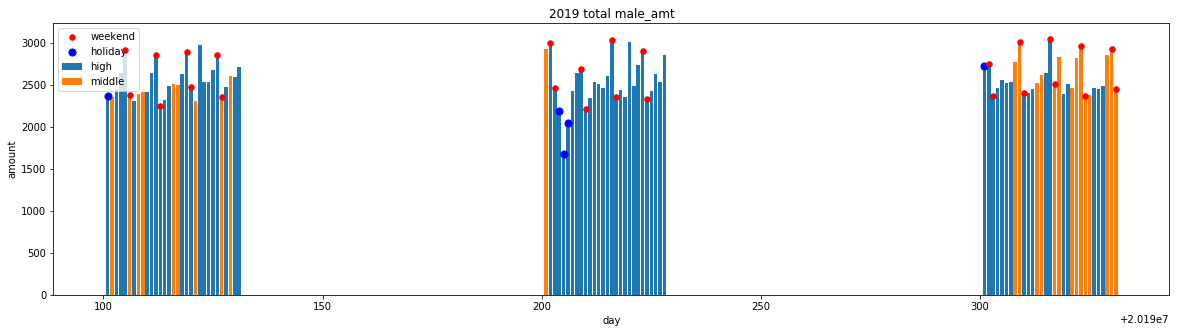

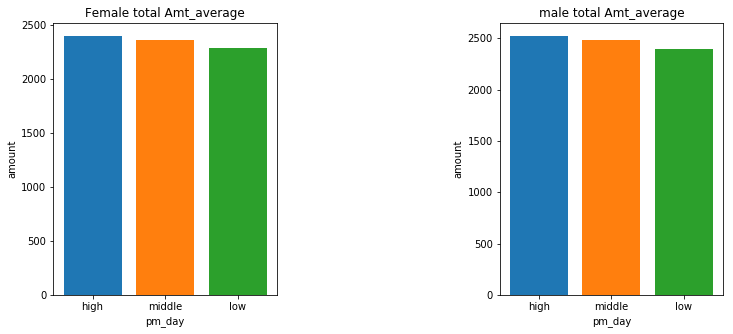

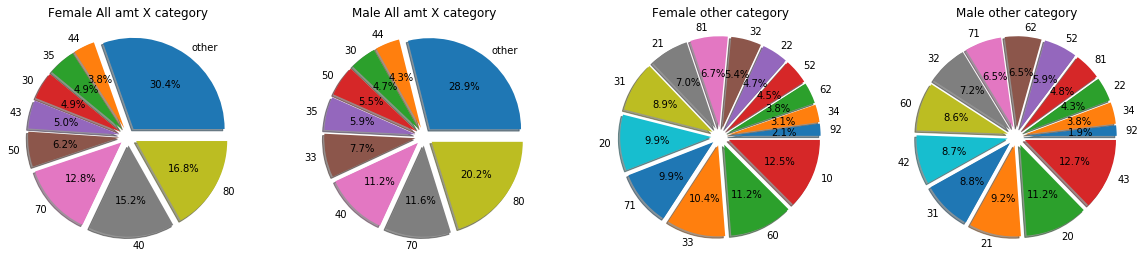

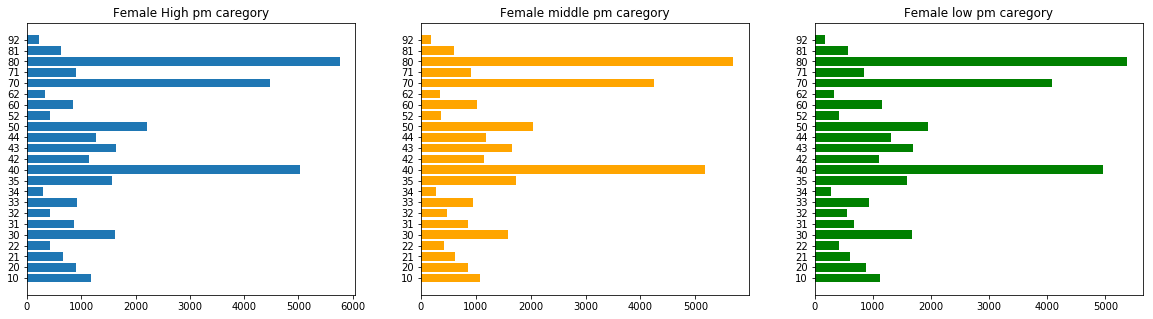

<Figure size 1296x864 with 0 Axes>

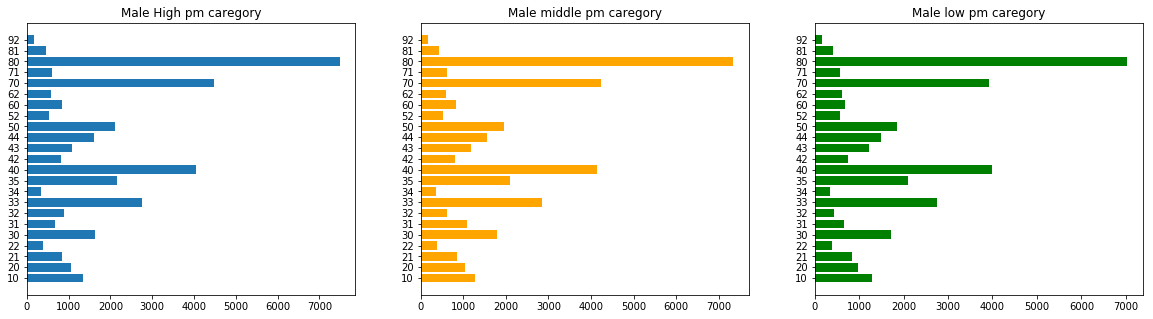

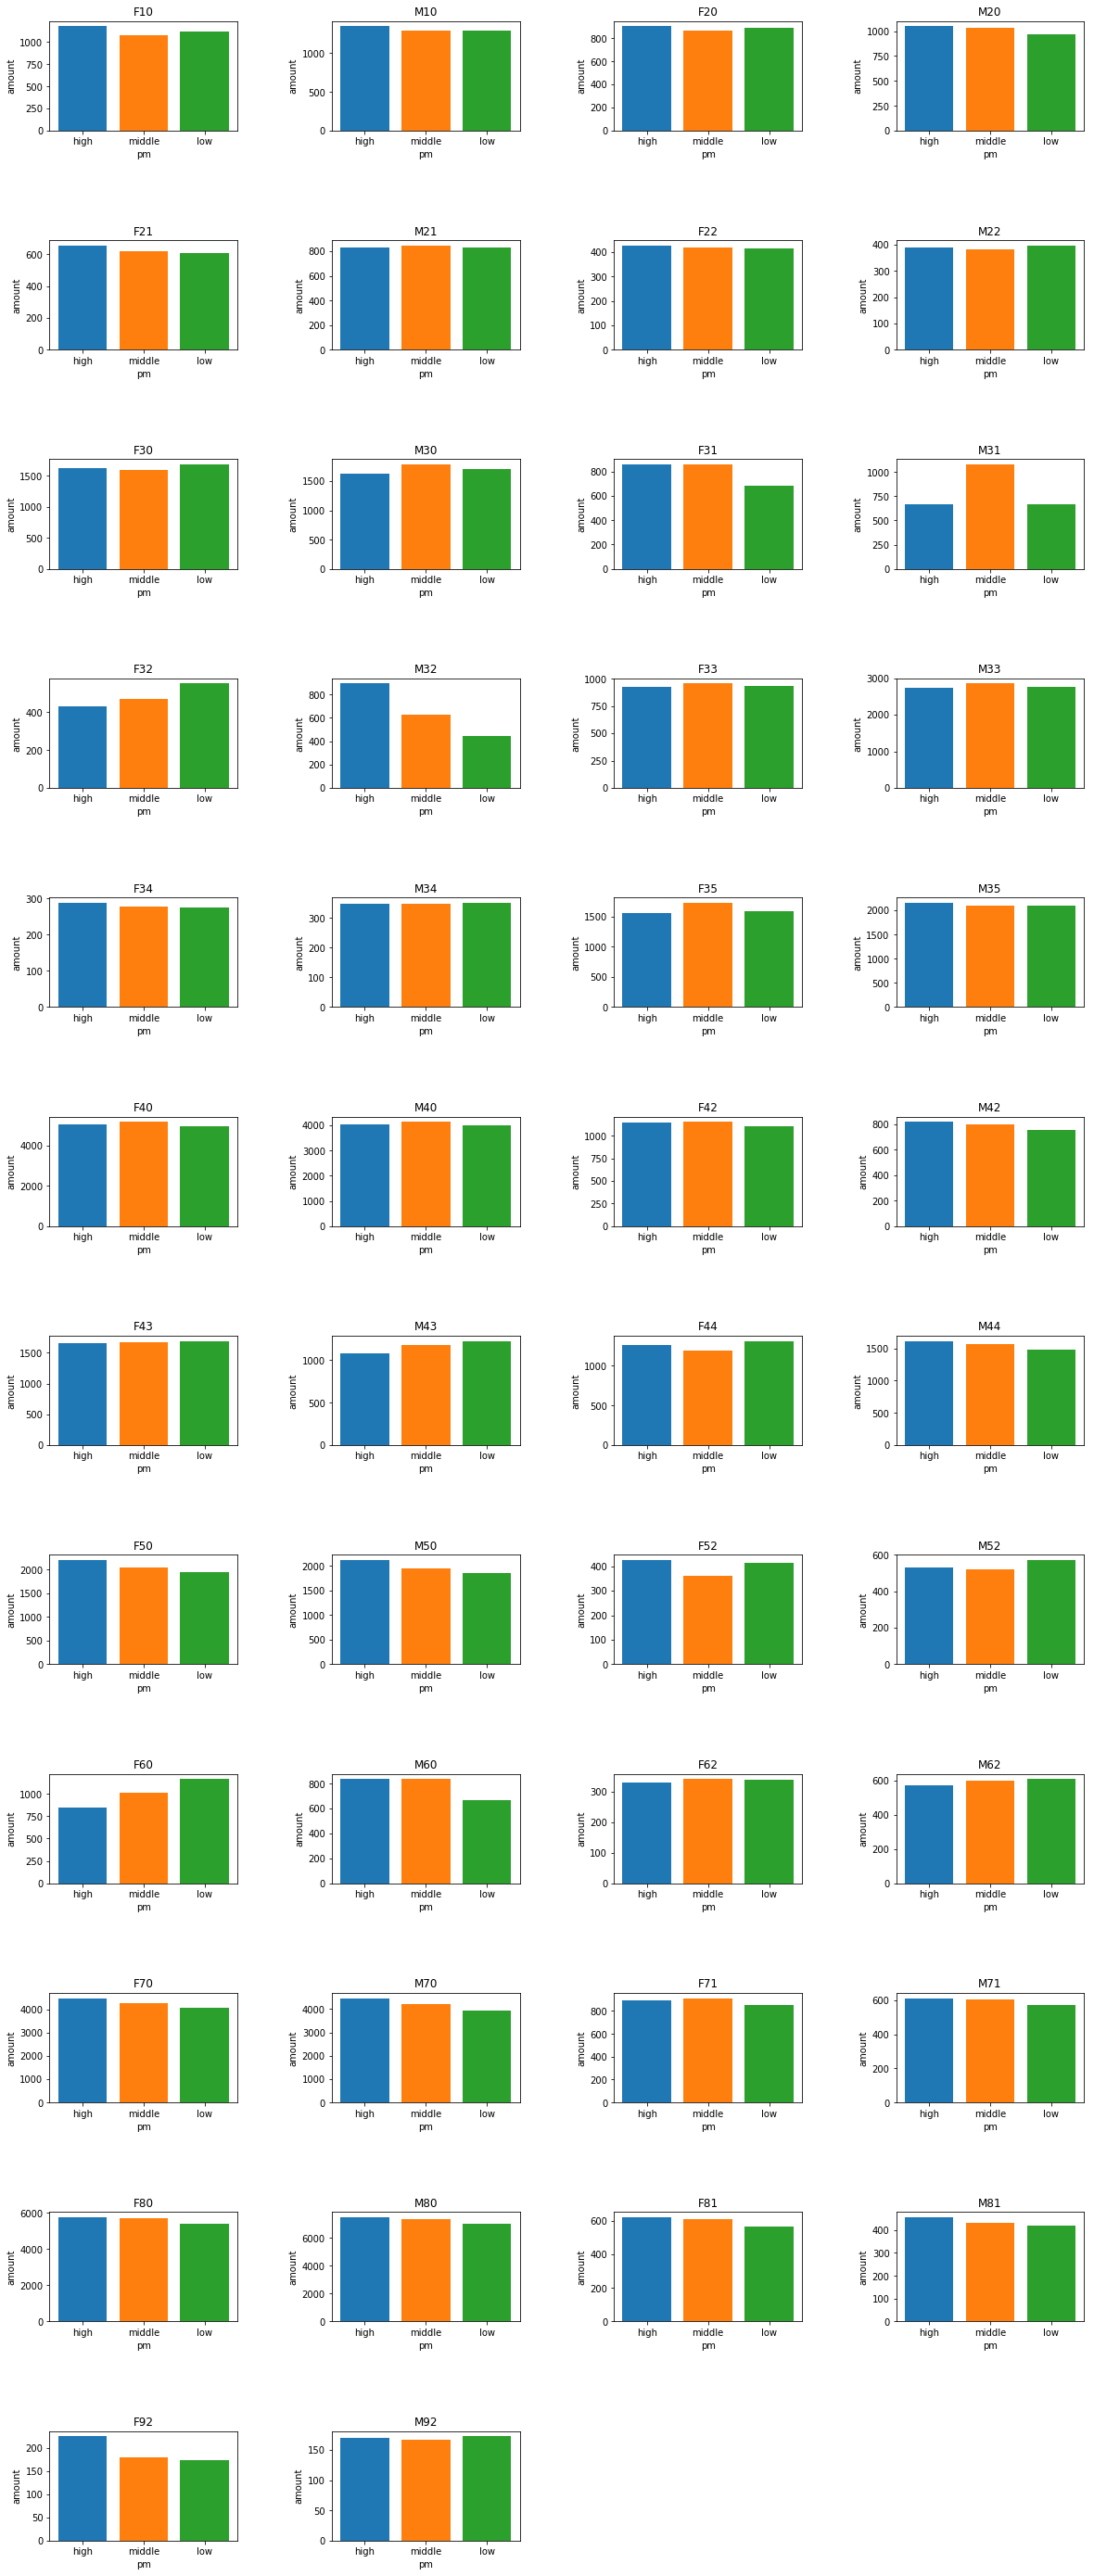

In [ ]:
female_date_amt = data_female.groupby('STD_DD')['USE_AMT'].mean()
    
pm_high_date_female_amt = []
pm_middle_date_female_amt = []
pm_low_date_female_amt = []

for i in pm_high_date:
    pm_high_date_female_amt.append([i,female_date_amt.loc[i]])
for i in pm_middle_date:
    pm_middle_date_female_amt.append([i,female_date_amt.loc[i]])
for i in pm_low_date:
    pm_low_date_female_amt.append([i,female_date_amt.loc[i]])
    
pm_high_date_female_amt = pd.DataFrame(pm_high_date_female_amt, columns = ['Day', 'Amt'])
pm_middle_date_female_amt = pd.DataFrame(pm_middle_date_female_amt,columns = ['Day', 'Amt'])
pm_low_date_female_amt = pd.DataFrame(pm_low_date_female_amt,columns = ['Day', 'Amt'])


pm_high_month_female = pm_high_date_female_amt
pm_middle_month_female = pm_middle_date_female_amt
pm_low_month_female = pm_low_date_female_amt


pm_high_month_1 = pm_high_date_female_amt[(pm_high_date_female_amt['Day']<month[9])]
pm_middle_month_1 = pm_middle_date_female_amt[(pm_middle_date_female_amt['Day']<month[9])]
pm_low_month_1 = pm_low_date_female_amt[(pm_low_date_female_amt['Day']<month[9])]

pm_high_month_2 = pm_high_date_female_amt[pm_high_date_female_amt['Day']>=month[9]]
pm_middle_month_2 = pm_middle_date_female_amt[pm_middle_date_female_amt['Day']>=month[9]]
pm_low_month_2 = pm_low_date_female_amt[pm_low_date_female_amt['Day']>=month[9]]



male_date_amt = data_male.groupby('STD_DD')['USE_AMT'].mean()
  
pm_high_date_male_amt = []
pm_middle_date_male_amt = []
pm_low_date_male_amt = []

for i in pm_high_date:
    pm_high_date_male_amt.append([i,male_date_amt.loc[i]])
for i in pm_middle_date:
    pm_middle_date_male_amt.append([i,male_date_amt.loc[i]])
for i in pm_low_date:
    pm_low_date_male_amt.append([i,male_date_amt.loc[i]])
    
pm_high_date_male_amt = pd.DataFrame(pm_high_date_male_amt, columns = ['Day', 'Amt'])
pm_middle_date_male_amt = pd.DataFrame(pm_middle_date_male_amt,columns = ['Day', 'Amt'])
pm_low_date_male_amt = pd.DataFrame(pm_low_date_male_amt,columns = ['Day', 'Amt'])


pm_high_month_male = pm_high_date_male_amt
pm_middle_month_male = pm_middle_date_male_amt
pm_low_month_male = pm_low_date_male_amt


pm_high_month_3 = pm_high_date_male_amt[(pm_high_date_male_amt['Day']<month[9])]
pm_middle_month_3 = pm_middle_date_male_amt[(pm_middle_date_male_amt['Day']<month[9])]
pm_low_month_3 = pm_low_date_male_amt[(pm_low_date_male_amt['Day']<month[9])]

pm_high_month_4 = pm_high_date_male_amt[pm_high_date_male_amt['Day']>=month[9]]
pm_middle_month_4 = pm_middle_date_male_amt[pm_middle_date_male_amt['Day']>=month[9]]
pm_low_month_4 = pm_low_date_male_amt[pm_low_date_male_amt['Day']>=month[9]]


plt.figure(figsize=(20,5))
plt.bar(pm_high_month_1['Day'], pm_high_month_1['Amt'])
plt.bar(pm_middle_month_1['Day'],pm_middle_month_1['Amt'])
plt.bar(pm_low_month_1['Day'],pm_low_month_1['Amt'])
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2018 total female_amt')
plt.scatter(df_female[(df_female['Day']<month[9])]['Day'],
            df_female[(df_female['Day']<month[9])]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi_female[(df_holi_female['Day']<month[9])]['Day'],
            df_holi_female[(df_holi_female['Day']<month[9])]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle', 'low'])


plt.figure(figsize=(20,5))
plt.bar(pm_high_month_3['Day'], pm_high_month_3['Amt'])
plt.bar(pm_middle_month_3['Day'],pm_middle_month_3['Amt'])
plt.bar(pm_low_month_3['Day'],pm_low_month_3['Amt'])
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2018 total male_amt')
plt.scatter(df_male[(df_male['Day']<month[9])]['Day'],
            df_male[(df_male['Day']<month[9])]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi_male[(df_holi_male['Day']<month[9])]['Day'],
            df_holi_male[(df_holi_male['Day']<month[9])]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle', 'low'])



plt.figure(figsize=(20,5))
plt.bar(pm_high_month_2['Day'], pm_high_month_2['Amt'])
plt.bar(pm_middle_month_2['Day'],pm_middle_month_2['Amt'])
plt.bar(pm_low_month_2['Day'],pm_low_month_2['Amt'])
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2019 total female_amt')
plt.scatter(df_female[df_female['Day']>=month[9]]['Day'],
            df_female[df_female['Day']>=month[9]]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi_female[df_holi_female['Day']>=month[9]]['Day'],
            df_holi_female[df_holi_female['Day']>=month[9]]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle'])


plt.figure(figsize=(20,5))
plt.bar(pm_high_month_4['Day'], pm_high_month_4['Amt'])
plt.bar(pm_middle_month_2['Day'],pm_middle_month_4['Amt'])
plt.bar(pm_low_month_4['Day'],pm_low_month_4['Amt'])
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2019 total male_amt')
plt.scatter(df_male[df_male['Day']>=month[9]]['Day'],
            df_male[df_male['Day']>=month[9]]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi_male[df_holi_male['Day']>=month[9]]['Day'],
            df_holi_male[df_holi_male['Day']>=month[9]]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle'])


middle_MCT_CAT_CD_female=[]
a=[]
for i in pm_middle_month_female['Day']:    
    a.append(data_female[data_female["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))    
for i in code:
    middle_MCT_CAT_CD_female.append([i,a.loc[i].mean()])

high_MCT_CAT_CD_female=[]
a=[]
for i in pm_high_month_female['Day']:    
    a.append(data_female[data_female["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))           
for i in code:
    high_MCT_CAT_CD_female.append([i,a.loc[i].mean()])
    
low_MCT_CAT_CD_female=[]   
a=[]
for i in pm_low_month_female['Day']:    
    a.append(data_female[data_female["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))             
for i in code:
    low_MCT_CAT_CD_female.append([i,a.loc[i].mean()])

high_MCT_CAT_CD_female = np.array(high_MCT_CAT_CD_female)
middle_MCT_CAT_CD_female = np.array(middle_MCT_CAT_CD_female)
low_MCT_CAT_CD_female = np.array(low_MCT_CAT_CD_female)

all_amt = (high_MCT_CAT_CD_female+middle_MCT_CAT_CD_female+low_MCT_CAT_CD_female)/3
pie =[]
pie.append(['other' , sum(sorted(all_amt, key= operator.itemgetter(1))[:15])[1]])
for i in range(8):
    pie.append([str(int(sorted(all_amt, key= operator.itemgetter(1))[15+i][0])),sorted(all_amt, key= operator.itemgetter(1))[15+i][1]])
pie = np.array(pie)         
pie_key = pie[:,0]
pie_val = pie[:,1]

pie_other = []
for i in range(14):
    pie_other.append([str(int(sorted(all_amt, key= operator.itemgetter(1))[i][0])) , sorted(all_amt, key= operator.itemgetter(1))[i][1]])                    
pie_other = np.array(pie_other)      
pie_other_key = pie_other[:,0]
pie_other_val = pie_other[:,1]



middle_MCT_CAT_CD_male=[]
a=[]
for i in pm_middle_month_male['Day']:    
    a.append(data_male[data_male["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))    
for i in code:
    middle_MCT_CAT_CD_male.append([i,a.loc[i].mean()])

high_MCT_CAT_CD_male=[]
a=[]
for i in pm_high_month_male['Day']:    
    a.append(data_male[data_male["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))           
for i in code:
    high_MCT_CAT_CD_male.append([i,a.loc[i].mean()])
    
low_MCT_CAT_CD_male=[]   
a=[]
for i in pm_low_month_male['Day']:    
    a.append(data_male[data_male["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
a=pd.concat(a)
code = list(set(a.index))             
for i in code:
    low_MCT_CAT_CD_male.append([i,a.loc[i].mean()])

high_MCT_CAT_CD_male = np.array(high_MCT_CAT_CD_male)
middle_MCT_CAT_CD_male = np.array(middle_MCT_CAT_CD_male)
low_MCT_CAT_CD_male = np.array(low_MCT_CAT_CD_male)

all_amt_male = (high_MCT_CAT_CD_male+middle_MCT_CAT_CD_male+low_MCT_CAT_CD_male)/3
pie_male =[]
pie_male.append(['other' , sum(sorted(all_amt_male, key= operator.itemgetter(1))[:15])[1]])
for i in range(8):
    pie_male.append([str(int(sorted(all_amt_male, key= operator.itemgetter(1))[15+i][0])),sorted(all_amt_male, key= operator.itemgetter(1))[15+i][1]])
pie_male = np.array(pie_male)         
pie_key_male = pie_male[:,0]
pie_val_male = pie_male[:,1]

pie_other_male = []
for i in range(14):
    pie_other_male.append([str(int(sorted(all_amt_male, key= operator.itemgetter(1))[i][0])) , sorted(all_amt_male, key= operator.itemgetter(1))[i][1]])                    
pie_other_male = np.array(pie_other_male)      
pie_other_key_male = pie_other_male[:,0]
pie_other_val_male = pie_other_male[:,1]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace = 0.8, wspace = 1)
plt.bar('high',pm_high_month_female['Amt'].mean())
plt.bar('middle',pm_middle_month_female['Amt'].mean())
plt.bar('low',pm_low_month_female['Amt'].mean())
plt.xlabel('pm_day')
plt.ylabel('amount')
plt.title('Female total Amt_average')

plt.subplot(1,2,2)
plt.subplots_adjust(hspace = 0.8, wspace = 1)
plt.bar('high',pm_high_month_male['Amt'].mean())
plt.bar('middle',pm_middle_month_male['Amt'].mean())
plt.bar('low',pm_low_month_male['Amt'].mean())
plt.xlabel('pm_day')
plt.ylabel('amount')
plt.title('male total Amt_average')

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
plt.pie(pie_val, labels=pie_key , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);
plt.title("Female All amt X category")

plt.subplot(1,4,3)
plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
plt.title("Female other category")
plt.pie(pie_other_val, labels=pie_other_key , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);

plt.subplot(1,4,2)
plt.pie(pie_val_male, labels=pie_key_male , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);
plt.title("Male All amt X category")

plt.subplot(1,4,4)
plt.title("Male other category")
plt.pie(pie_other_val_male, labels=pie_other_key_male , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);

high_MCT_female=[]
middle_MCT_female=[]
low_MCT_female=[]
high_MCT_code_female=[]
middle_MCT_code_female=[]
low_MCT_code_female=[]
for i in range(len(high_MCT_CAT_CD_female)):
    high_MCT_female.append(high_MCT_CAT_CD_female[i,1])
    high_MCT_code_female.append(str(int(high_MCT_CAT_CD_female[i,0])))
    middle_MCT_female.append(middle_MCT_CAT_CD_female[i,1])
    middle_MCT_code_female.append(str(int(middle_MCT_CAT_CD_female[i,0])))   
    low_MCT_female.append(low_MCT_CAT_CD_female[i,1])
    low_MCT_code_female.append(str(int(low_MCT_CAT_CD_female[i,0])))
    
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
plt.barh(high_MCT_code_female , high_MCT_female)
plt.title("Female High pm caregory")
plt.subplot(1,3,2)
plt.barh(middle_MCT_code_female , middle_MCT_female, color = 'orange')
plt.title("Female middle pm caregory")
plt.subplot(1,3,3)
plt.barh(low_MCT_code_female , low_MCT_female , color = 'g' )
plt.title("Female low pm caregory")
plt.figure(figsize= (18,12))

high_MCT_male=[]
middle_MCT_male=[]
low_MCT_male=[]
high_MCT_code_male=[]
middle_MCT_code_male=[]
low_MCT_code_male=[]
for i in range(len(high_MCT_CAT_CD_male)):
    high_MCT_male.append(high_MCT_CAT_CD_male[i,1])
    high_MCT_code_male.append(str(int(high_MCT_CAT_CD_male[i,0])))
    middle_MCT_male.append(middle_MCT_CAT_CD_male[i,1])
    middle_MCT_code_male.append(str(int(middle_MCT_CAT_CD_male[i,0])))   
    low_MCT_male.append(low_MCT_CAT_CD_male[i,1])
    low_MCT_code_male.append(str(int(low_MCT_CAT_CD_male[i,0])))
    
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
plt.barh(high_MCT_code_male , high_MCT_male)
plt.title("Male High pm caregory")
plt.subplot(1,3,2)
plt.barh(middle_MCT_code_male , middle_MCT_male, color = 'orange')
plt.title("Male middle pm caregory")
plt.subplot(1,3,3)
plt.barh(low_MCT_code_male , low_MCT_male , color = 'g' )
plt.title("Male low pm caregory")

plt.figure(figsize= (20,50))
for i in range(23):
    plt.subplot(12,4,2*i+1)
    plt.subplots_adjust(hspace = 1, wspace = 0.5)
    plt.bar('high', high_MCT_CAT_CD_female[i,1])
    plt.bar('middle', middle_MCT_CAT_CD_female[i,1])
    plt.bar('low', low_MCT_CAT_CD_female[i,1])
    plt.xlabel('pm')
    plt.ylabel('amount')
    plt.title("F"+str(int(high_MCT_CAT_CD_female[i,0])))
    plt.subplot(12,4,2*i+2)
    plt.subplots_adjust(hspace = 1, wspace = 0.5)
    plt.bar('high', high_MCT_CAT_CD_male[i,1])
    plt.bar('middle', middle_MCT_CAT_CD_male[i,1])
    plt.bar('low', low_MCT_CAT_CD_male[i,1])
    plt.xlabel('pm')
    plt.ylabel('amount')
    plt.title("M"+str(int(high_MCT_CAT_CD_male[i,0])))
    

성별에 따른 미세먼지별 소비량, 매출구성 시각화

In [ ]:
data_AGE = data

In [ ]:
data_AGE['AGE_CD'] = data_AGE['AGE_CD']//10

In [ ]:
data_AGE.head()

,STD_DD,GU_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20180401,11110515,21,F,3,4,180
1,20180401,11110515,21,F,5,4,22
2,20180401,11110515,21,M,2,35,184
3,20180401,11110515,21,M,2,70,425
4,20180401,11110515,21,M,3,18,82


10살 단위로 연령구분 변경

In [ ]:
data['AGE_CD'].unique()

array([3, 5, 2, 4, 6], dtype=int64)

In [ ]:
data_AGE['AGE_CD'].unique()

array([3, 5, 2, 4, 6], dtype=int64)

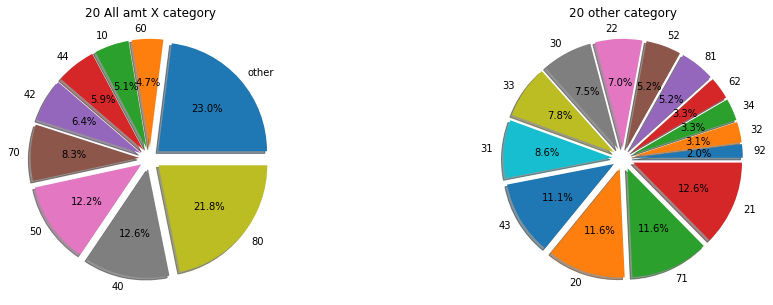

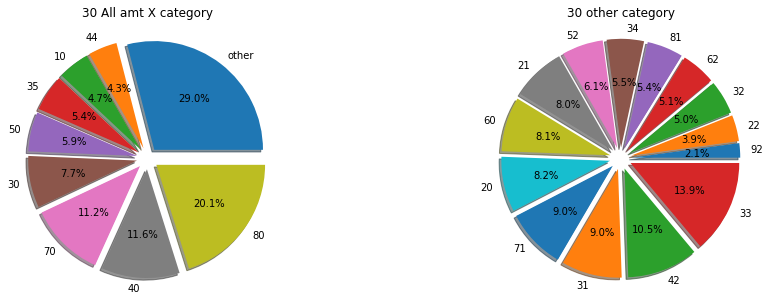

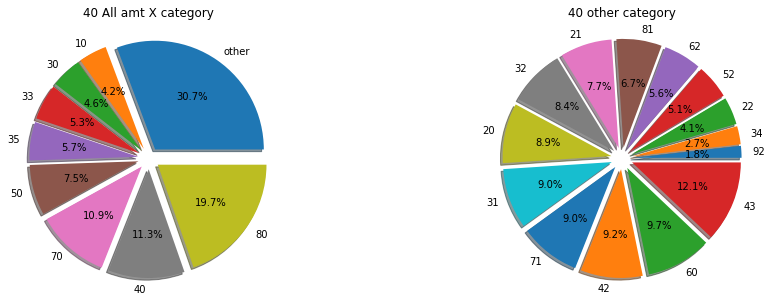

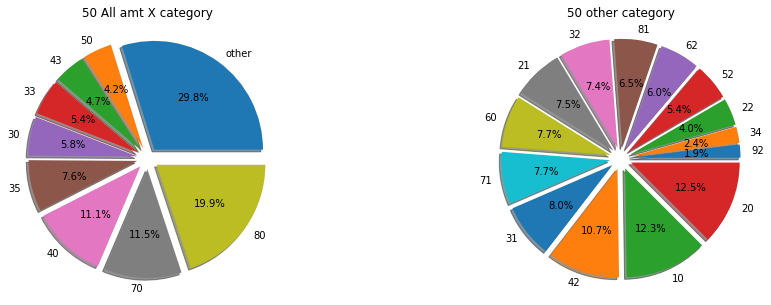

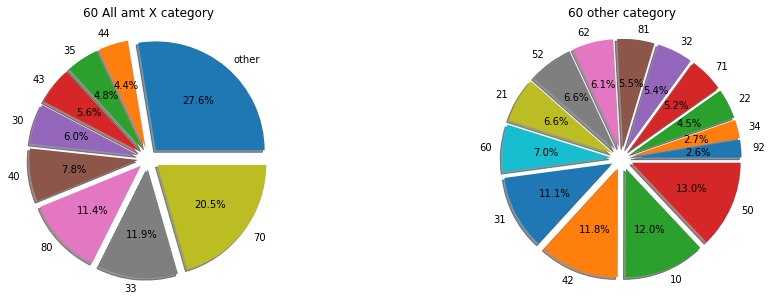

In [ ]:
for k in range(5):
    data_AGE_sample = data_AGE[data_AGE['AGE_CD']==k+2]
    b=[]
    for i in data_AGE_sample['STD_DD'].unique():    
        b.append(data_AGE_sample[data_AGE_sample["STD_DD"]==i].groupby('MCT_CAT_CD')['USE_AMT'].mean())
    b=pd.concat(b)
    code_b = list(set(b.index)) 
    AGE_sample=[]
    for i in code_b:
        AGE_sample.append([i,b.loc[i].mean()])

    AGE_sample =np.array(AGE_sample)
    pie_AGE =[]
    pie_AGE.append(['other' , sum(sorted(np.array(AGE_sample), key= operator.itemgetter(1))[:15])[1]])
    for i in range(8):
        pie_AGE.append([str(int(sorted(AGE_sample, key= operator.itemgetter(1))[15+i][0])),sorted(all_amt_male, key= operator.itemgetter(1))[15+i][1]])
    pie_AGE = np.array(pie_AGE)         
    pie_key_AGE =pie_AGE[:,0]
    pie_val_AGE = pie_AGE[:,1]

    pie_other_AGE = []
    for i in range(14):
        pie_other_AGE.append([str(int(sorted(AGE_sample, key= operator.itemgetter(1))[i][0])) , sorted(AGE_sample, key= operator.itemgetter(1))[i][1]])                    
    pie_other_AGE = np.array(pie_other_AGE)      
    pie_other_key_AGE = pie_other_AGE[:,0]
    pie_other_val_AGE = pie_other_AGE[:,1]


    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
    plt.pie(pie_val_AGE, labels=pie_key_AGE , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);
    plt.title(str(k+2)+"0 All amt X category")

    plt.subplot(1,2,2)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
    plt.title(str(k+2)+"0 other category")
    plt.pie(pie_other_val_AGE, labels=pie_other_key_AGE , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);


연령대별 매출 구성 시각화

In [ ]:
category = list(data['MCT_CAT_CD'].unique())

In [ ]:
data_category_USE_CNT=[]
for i in category:
    data_category_USE_CNT.append([i,data[data['MCT_CAT_CD']==i].groupby('STD_DD')['USE_CNT'].sum()])

In [ ]:
for i in range(23):
    if len(data_category_USE_CNT[i][1])!=365:
        for k in list(data['STD_DD'].unique()):
            if not k in data_category_USE_CNT[i][1].index:
                data_category_USE_CNT[i][1][k]=0
   

In [ ]:
data_category_USE_CNT_pm_high = pd.DataFrame(pm_high_date, columns = ['Day'])
data_category_USE_CNT_pm_middle = pd.DataFrame(pm_middle_date, columns = ['Day'])
data_category_USE_CNT_pm_low = pd.DataFrame(pm_low_date, columns = ['Day'])

미세먼지별 결제횟수 데이터 프레임 만들기

In [ ]:
for k in range(23):
    data_category_USE_CNT_high= []
    data_category_USE_CNT_middle= []
    data_category_USE_CNT_low= []
    for i in list(data['STD_DD'].unique()):
        if i in list(pm_high_date):
            data_category_USE_CNT_high.append([i,data_category_USE_CNT[k][1].loc[i]])
        elif i in list(pm_middle_date):
            data_category_USE_CNT_middle.append([i,data_category_USE_CNT[k][1].loc[i]])
        elif i in list(pm_low_date):
            data_category_USE_CNT_low.append([i,data_category_USE_CNT[k][1].loc[i]])
        
    data_category_USE_CNT_high = np.array(data_category_USE_CNT_high)
    data_category_USE_CNT_middle = np.array(data_category_USE_CNT_middle)
    data_category_USE_CNT_low = np.array(data_category_USE_CNT_low)

    data_category_USE_CNT_pm_high[str(data_category_USE_CNT[k][0])]=data_category_USE_CNT_high[:,1]
    data_category_USE_CNT_pm_middle[str(data_category_USE_CNT[k][0])]=data_category_USE_CNT_middle[:,1]
    data_category_USE_CNT_pm_low[str(data_category_USE_CNT[k][0])]=data_category_USE_CNT_low[:,1]

In [ ]:
data_category_USE_CNT_pm_high.head()

,Day,21,22,34,40,42,44,50,52,62,...,92,10,33,20,35,43,32,31,30,60
0,20180406,14986,4602,498,240948,4581,2286,28869,368,5602,...,1475,1563,11077,1666,684,381,184,44,63,28
1,20180419,12738,3256,514,252800,5025,2302,24400,567,5816,...,1482,1449,10369,1726,491,497,116,36,29,32
2,20180420,15173,3688,498,263591,5959,2698,26681,434,6202,...,1722,1760,11108,2298,603,466,108,24,53,57
3,20180421,18624,6597,436,269972,8414,4710,35753,216,12130,...,2701,3021,11867,3404,1170,704,134,24,69,65
4,20180427,16903,6795,452,259722,6431,3185,26288,226,6738,...,1526,2031,11204,2007,618,569,145,68,66,41


In [ ]:
data_category_USE_CNT_pm_middle.head()

,Day,21,22,34,40,42,44,50,52,62,...,92,10,33,20,35,43,32,31,30,60
0,20180401,17397,7255,253,221891,5794,2884,36984,139,6880,...,719,2456,10227,2651,485,199,52,4,88,0
1,20180402,12259,3001,531,249341,4878,2229,30681,574,6020,...,2305,1397,10434,1591,847,486,102,25,32,40
2,20180403,12742,3240,445,251075,4905,2010,27180,550,6071,...,1742,1423,10087,1606,701,519,121,25,70,69
3,20180407,18463,7830,361,231940,6950,3447,41385,216,9129,...,2366,2440,12992,3329,744,572,91,45,107,44
4,20180409,11668,2447,517,242905,3877,1812,28279,546,6429,...,1915,1405,11424,1370,734,447,167,41,49,28


In [ ]:
data_category_USE_CNT_pm_low.head()

,Day,21,22,34,40,42,44,50,52,62,...,92,10,33,20,35,43,32,31,30,60
0,20180404,12301,3363,532,264280,4770,2193,27374,459,6236,...,2508,1280,10295,1674,727,571,163,29,62,32
1,20180405,13140,3600,395,225549,3162,1453,23864,435,5247,...,1095,1655,9572,1387,511,378,121,29,71,24
2,20180408,16782,6666,189,183426,3588,1963,35807,159,6741,...,427,2252,10425,1866,394,131,99,12,51,0
3,20180414,17882,7228,513,232876,5992,3479,37399,215,5975,...,1997,3054,10539,3056,724,480,107,32,75,28
4,20180423,11120,1655,350,217923,2282,1002,19413,433,4866,...,1124,1480,8888,881,604,355,70,16,20,32


미세먼지별 카테고리에 따른 결제 횟수

In [ ]:
h = data_category_USE_CNT_pm_high
m = data_category_USE_CNT_pm_middle
l = data_category_USE_CNT_pm_low

In [ ]:
h = h.drop('Day', axis=1)
m = m.drop('Day', axis=1)
l = l.drop('Day', axis=1)

Text(0, 0.5, 'count')

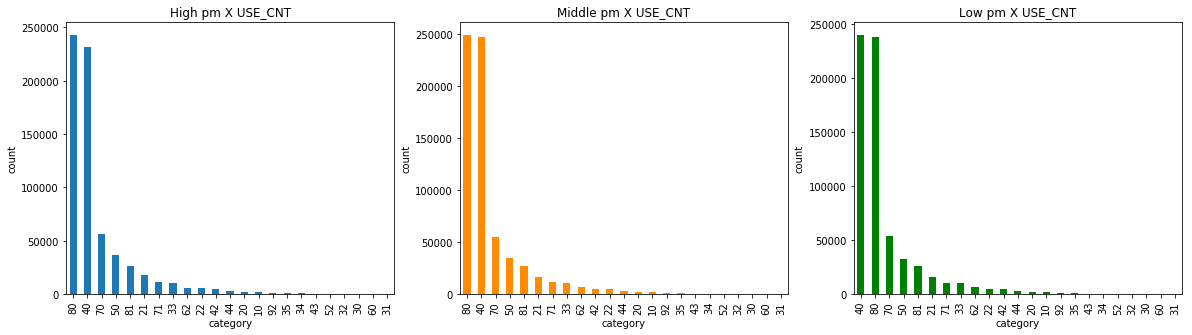

In [ ]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
h.mean().sort_values(ascending =False).plot.bar(title = 'High pm X USE_CNT')
plt.xlabel('category')
plt.ylabel('count')
plt.subplot(1,3,2)
m.mean().sort_values(ascending =False).plot.bar(title = 'Middle pm X USE_CNT', color='darkorange')
plt.xlabel('category')
plt.ylabel('count')
plt.subplot(1,3,3)
l.mean().sort_values(ascending =False).plot.bar(title = 'Low pm X USE_CNT', color='g')
plt.xlabel('category')
plt.ylabel('count')

미세먼지별 결제 횟수 시각화

In [ ]:
l.columns

Index(['21', '22', '34', '40', '42', '44', '50', '52', '62', '70', '71', '80',
       '81', '92', '10', '33', '20', '35', '43', '32', '31', '30', '60'],
      dtype='object')

Text(0.5, 1.0, '70')

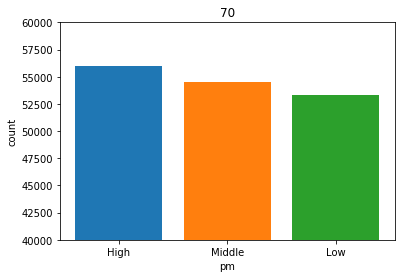

In [ ]:
plt.bar('High', h['70'].mean())
plt.bar('Middle', m['70'].mean())
plt.bar('Low', l['70'].mean())
plt.ylim(40000,60000)
plt.xlabel('pm')
plt.ylabel('count')
plt.title('70')


의료분야 결제횟수

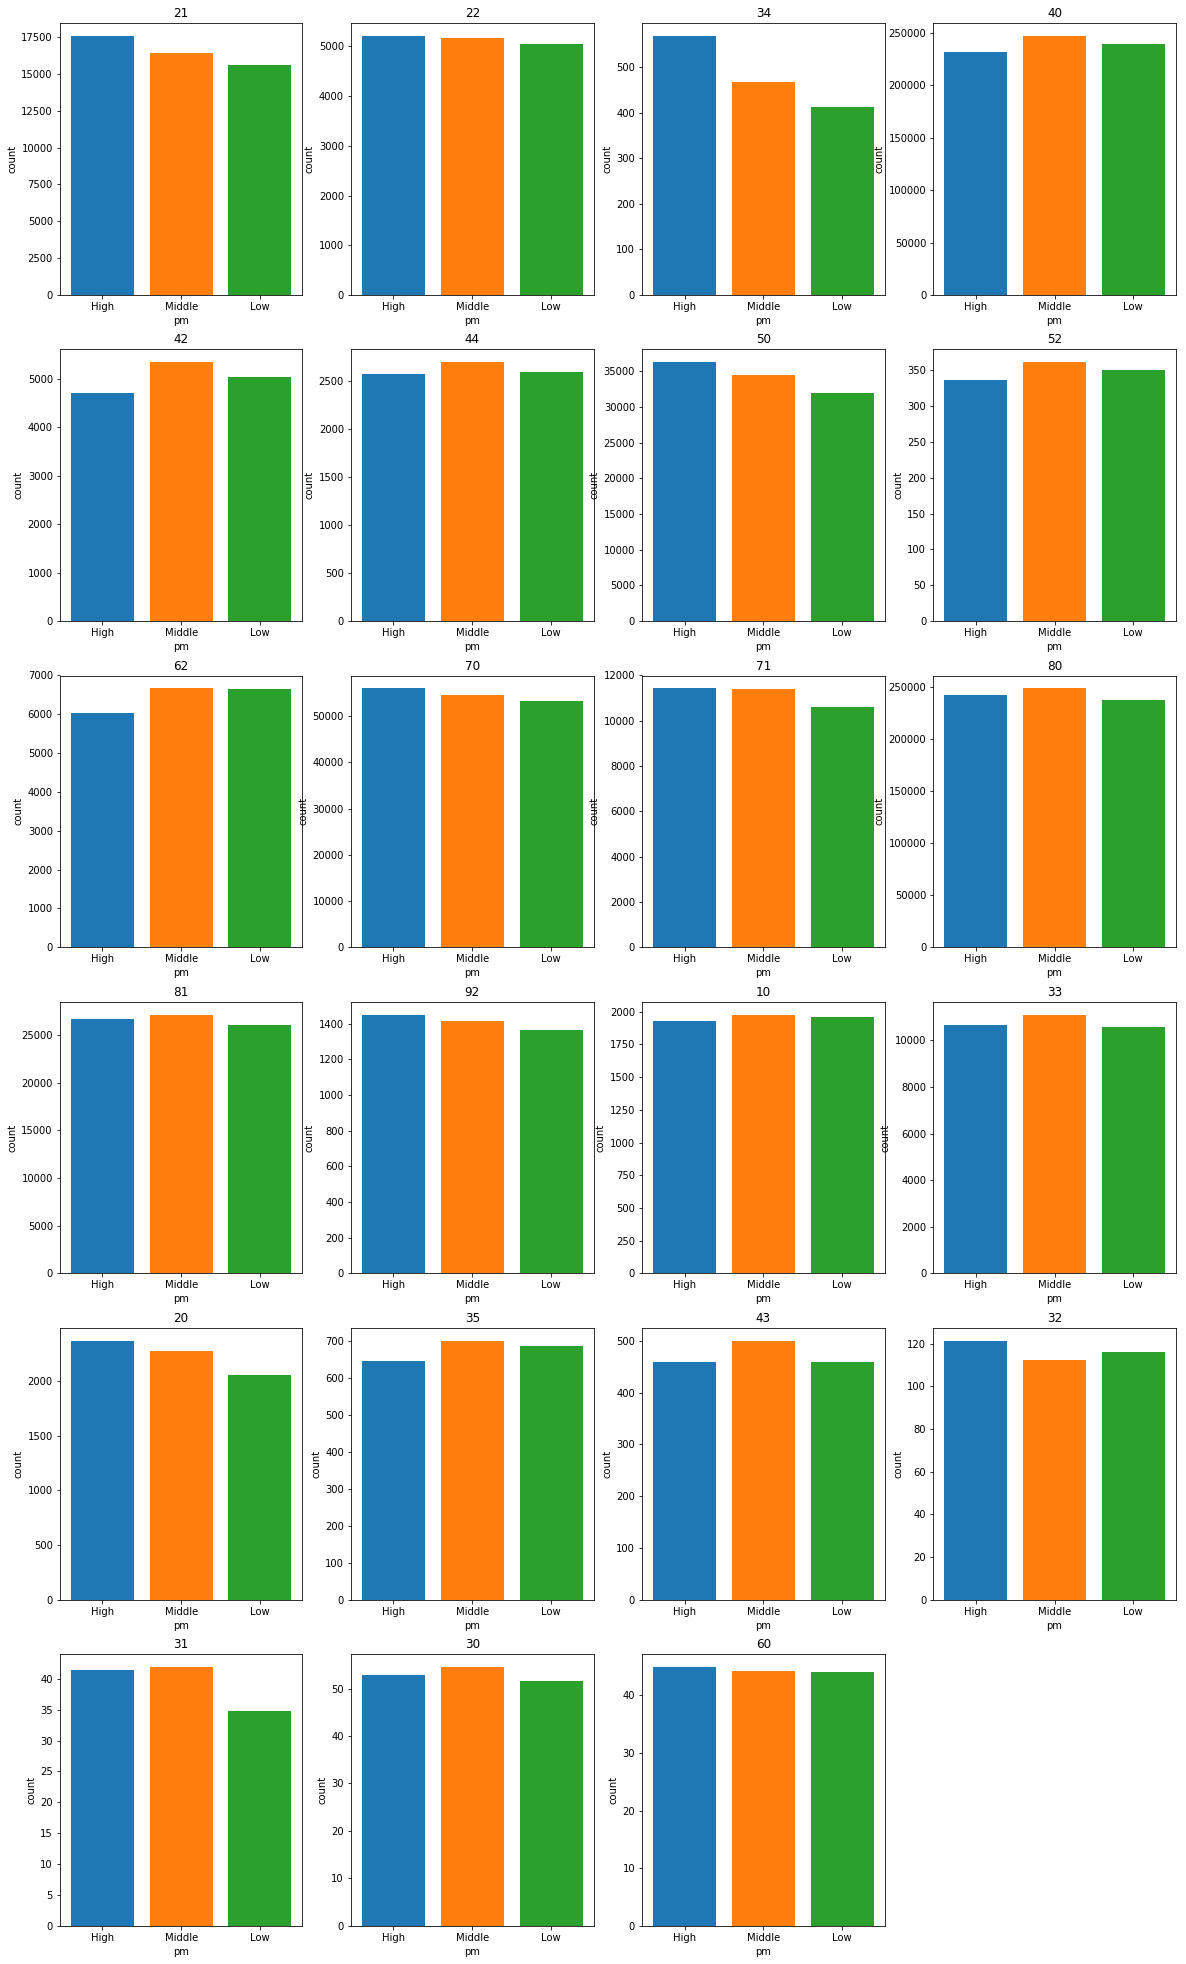

In [ ]:
fignum = 1
plt.figure(figsize=(20,35))
for i in h.columns:
    plt.subplot(6,4,fignum)
    plt.bar('High', h[i].mean())
    plt.bar('Middle', m[i].mean())
    plt.bar('Low', l[i].mean())
    plt.xlabel('pm')
    plt.ylabel('count')
    plt.title(str(i))
    fignum+=1


미세먼지에 따른 결제횟수 시각화

In [ ]:
fn=1
plt.figure(figsize=(20,35))
for i in list(data_AGE['MCT_CAT_CD'].unique()):
    plt.subplot(6,4,fn)
    data_AGE_sample= data_AGE[data_AGE['MCT_CAT_CD']==i]
    data_AGE_sample_M = data_AGE_sample[data_AGE_sample['SEX_CD']=='M']
    data_AGE_sample_F = data_AGE_sample[data_AGE_sample['SEX_CD']=='F']
    data_AGE_sample_M.groupby('AGE_CD')['USE_AMT'].sum().plot.bar()
    data_AGE_sample_F.groupby('AGE_CD')['USE_AMT'].sum().plot.bar(bottom=data_AGE_sample_M.groupby('AGE_CD')['USE_AMT'].sum(),color='tomato')
    plt.legend(['M','F'])
    plt.xlabel('age')
    plt.ylabel('amount')
    plt.title(str(i))
    fn+=1

미세먼지에 따른 연령 + 카테고리 + 성별 매출 시각화

In [ ]:
    data_AGE_sample= data_AGE[data_AGE['MCT_CAT_CD']==70]
    data_AGE_sample_M = data_AGE_sample[data_AGE_sample['SEX_CD']=='M']
    data_AGE_sample_F = data_AGE_sample[data_AGE_sample['SEX_CD']=='F']
    data_AGE_sample_M.groupby('AGE_CD')['USE_AMT'].sum().plot.bar()
    data_AGE_sample_F.groupby('AGE_CD')['USE_AMT'].sum().plot.bar(bottom=data_AGE_sample_M.groupby('AGE_CD')['USE_AMT'].sum(),color='tomato')
    plt.legend(['M','F'])
    plt.xlabel('age')
    plt.ylabel('amount')
    plt.title(70)


의료분야

In [ ]:
    data_AGE_sample= data_AGE[data_AGE['MCT_CAT_CD']==50]
    data_AGE_sample_M = data_AGE_sample[data_AGE_sample['SEX_CD']=='M']
    data_AGE_sample_F = data_AGE_sample[data_AGE_sample['SEX_CD']=='F']
    data_AGE_sample_M.groupby('AGE_CD')['USE_AMT'].sum().plot.bar()
    data_AGE_sample_F.groupby('AGE_CD')['USE_AMT'].sum().plot.bar(bottom=data_AGE_sample_M.groupby('AGE_CD')['USE_AMT'].sum(),color='tomato')
    plt.legend(['M','F'])
    plt.xlabel('age')
    plt.ylabel('amount')
    plt.title(50)


서적 분야

In [ ]:
h_list =[]
m_list =[]
for i in high_MCT_CAT_CD:
    h_list.append([i[0], h.mean().loc[str(int(i[0]))]*i[1]])
for i in m_l_MCT_CAT_CD:
    m_list.append([i[0], (m.mean().loc[str(int(i[0]))]*i[1]+l.mean().loc[str(int(i[0]))]*i[1])/2])



In [ ]:
all_amt=data.groupby('MCT_CAT_CD')['USE_AMT'].sum()
all_list=all_amt


code_all = list(set(all_list.index)) 
all_sample=[]
for i in code_all:
    all_sample.append([i,all_list.loc[i]])
all_sample=np.array(all_sample)
pie_All =[]
pie_All.append(['other' , sum(sorted(np.array(all_sample), key= operator.itemgetter(1))[:15])[1]]) 
for i in range(8):
    pie_All.append([str(int(sorted(all_sample, key= operator.itemgetter(1))[15+i][0])),str(int(sorted(all_sample, key= operator.itemgetter(1))[15+i][1]))])
pie_All = np.array(pie_All)         
pie_key_All =pie_All[:,0]
pie_val_All = pie_All[:,1]

In [ ]:
all_amt=data.groupby('MCT_CAT_CD')['USE_AMT'].sum()
all_list=all_amt


code_all = list(set(all_list.index)) 
all_sample=[]
for i in code_all:
    all_sample.append([i,all_list.loc[i]])
all_sample=np.array(all_sample)
pie_All =[]
pie_All.append(['other' , sum(sorted(np.array(all_sample), key= operator.itemgetter(1))[:15])[1]]) 
for i in range(8):
    pie_All.append([str(int(sorted(all_sample, key= operator.itemgetter(1))[15+i][0])),str(int(sorted(all_sample, key= operator.itemgetter(1))[15+i][1]))])
pie_All = np.array(pie_All)         
pie_key_All =pie_All[:,0]
pie_val_All = pie_All[:,1]
pie_All_other = []
for i in range(14):
    pie_All_other.append([str(int(sorted(all_sample, key= operator.itemgetter(1))[i][0])) , sorted(all_sample, key= operator.itemgetter(1))[i][1]])                    
pie_All_other = np.array(pie_All_other)      
pie_All_other_key = pie_other_AGE[:,0]
pie_All_other_val = pie_other_AGE[:,1]
    
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.pie(pie_val_All, labels=pie_key_All , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);
plt.title("All amt X category")
plt.subplot(1,2,2)
plt.title("other category")
plt.pie(pie_All_other_val, labels=pie_All_other_key , explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True);

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data[data["MCT_CAT_CD"]==70].groupby("AGE_CD")['USE_AMT'].mean().plot()
plt.title("Average amt")
plt.subplot(1,2,2)
data[data["MCT_CAT_CD"]==70].groupby("AGE_CD")['USE_CNT'].mean().plot()
plt.title("Average cnt")